In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,Flatten
from keras import optimizers
from keras.utils import to_categorical

In [3]:
dataset = mnist.load_data(r'D:\code_basket\python\DeepLearning\data\mnist.npz')
(x_train,y_train),(x_test,y_test) = dataset
x_train_flat = x_train.reshape(x_train.shape[0],28*28).astype('float32')/255
x_test_flat = x_test.reshape(x_test.shape[0],28*28).astype('float32')/255
y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)

x_train_norm = x_train.reshape(x_train.shape[0],28,28,1).astype('float32')/255
x_test_norm = x_test.reshape(x_test.shape[0],28,28,1).astype('float32')/255

In [5]:
model = Sequential()
model.add(Conv2D(32,(5,5),activation="relu",input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.1))
model.add(Conv2D(15,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.1))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(10,activation="softmax"))
model.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics=["acc"])

In [6]:
hist = model.fit(x_train_norm,y_train_onehot,epochs=20,batch_size=128,verbose=0)

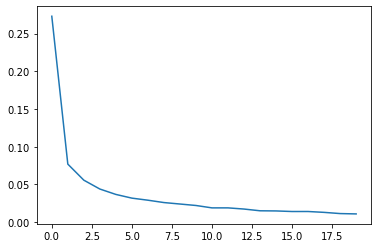

In [7]:
plt.plot(range(len(hist.history['loss'])),hist.history['loss'])

In [8]:
loss,acc = model.evaluate(x_test_norm,y_test_onehot)
print(loss,acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0277 - acc: 0.9938
0.027742508798837662 0.9937999844551086
